## Lesson 1: Metrics

**Exercise 1: Assessing a diabetes prediction classifier**
In this chapter, you'll work with the `diabetes_df` dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features of body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into `X_train`, `X_test`, `y_train`, and `y_test`. In addition, a `KNeighborsClassifier()` has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

- Import confusion_matrix and classification_report.
- Fit the model to the training data.
- Predict the labels of the test set, storing the results as `y_pred`.
- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [1]:
import pandas as pd

diabetes_df = pd.read_csv('data/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop(['diabetes'], axis = 1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 13]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



## Lesson 2: Logistic regression and the ROC curve

**Exercise 1: Building a logistic regression model**
In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into `X_train`, `X_test`, `y_train`, and `y_test`, and preloaded for you.

- Import `LogisticRegression`.
- Instantiate a logistic regression model, `logreg`.
- Fit the model to the training data.
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as `y_pred_probs`.

In [8]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=500)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.62326484 0.11031148 0.27089814 0.28041191 0.00428979 0.18126228
 0.47430947 0.91590715 0.10233408 0.7905479 ]


**Exercise 2: The ROC curve**
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test `labels`, `y_test`, and the predicted probabilities of the test features belonging to the positive class, `y_pred_probs`, have been preloaded for you, along with `matplotlib.pyplot` as plt.

You will create a ROC curve and then interpret the results.

- Import roc_curve.
- Calculate the ROC curve values, using `y_test` and `y_pred_probs`, and unpacking the results into `fpr`, `tpr`, and `thresholds`.
- Plot true positive rate against false positive rate.

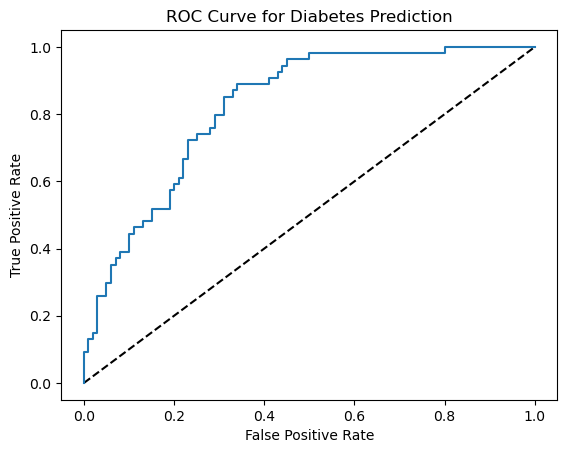

In [10]:
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

**Question**
Well done on producing the ROC curve for the diabetes prediction model.

But, what does the plot tell you about the model's performance?

Possible answers
- The model is about as good as randomly guessing the class of each observation.
- The model is much worse than randomly guessing the class of each observation.
- The model is much better than randomly guessing the class of each observation. &#10003; 
- It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.

**Exercise 2: ROC AUC**
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the `logreg` model you previously built, plus `X_train`, `X_test`, `y_train`, `y_test`. Also, the model's predicted test set labels are stored as y_pred, and probabilities of test set observations belonging to the positive class stored as `y_pred_probs`.

A knn model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.

- Import `roc_auc_score`.
- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
- Calculate and print the confusion matrix.
- Call `classification_report()`.

In [11]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))


0.8229629629629629
[[87 13]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



## Lesson 3: Hyperparameter tuning

**Exercise 1: Hyperparameter tuning with GridSearchCV**

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you. A KFold() object has been created and stored for you as `kf`, along with a lasso regression model as lasso.

- Import GridSearchCV.
- Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
- Call `GridSearchCV()`, passing lasso, the parameter grid, and setting `cv` equal to `kf`.
- Fit the grid search object to the training data to perform a cross-validated grid search.

In [12]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold 

# Create a KFold object (assuming you wanted 6 folds as in your previous examples)
kf = KFold(n_splits=6, shuffle=True, random_state=5) 

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.0001, 1, 20)} # Slightly adjusted range

# Instantiate Lasso (add a random_state for reproducibility)
lasso = Lasso(random_state=42) 

# Instantiate GridSearchCV
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf, scoring='r2') # Use 'r2' for scoring

# Fit to the training data
lasso_cv.fit(X_train, y_train)  

# Print results 
print("Tuned Lasso parameters: {}".format(lasso_cv.best_params_))
print("Tuned Lasso R-squared: {}".format(lasso_cv.best_score_)) 

Tuned Lasso parameters: {'alpha': 0.0001}
Tuned Lasso R-squared: 0.2549199917155023


**Exercise 2: Hyperparameter tuning with RandomizedSearchCV**

As you saw, `GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use `RandomizedSearchCV`, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as `X_train`, `X_test`, `y_train`, and `y_test`, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

- Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and `class_weight` to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
- Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
- Fit `logreg_cv` to the training data.
- Print the model's best parameters and accuracy score.

In [15]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, KFold 

# Create the parameter space
params = {"penalty": ["l1", "l2"],
          "tol": np.linspace(0.0001, 1.0, 50),
          "C": np.linspace(0.1, 1, 50),
          "class_weight": ["balanced", {0: 0.8, 1: 0.2}]}

# Instantiate the KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5) 

# Instantiate Logistic Regression
logreg = LogisticRegression(random_state=42, solver='saga') 

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf, scoring='accuracy') 

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_)) 


Tuned Logistic Regression Parameters: {'tol': 0.32659795918367346, 'penalty': 'l1', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.926530612244898}
Tuned Logistic Regression Best Accuracy Score: 0.6517069611015928
